El presente Jupyter Pretende unificar las bases correspondientes al IHD, la Población y SECOP. Obtenidos en Jupyter's anteriores, esto con el fin de unificar estos archivos y generar una sola base.

In [21]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import re
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Se llama la base de SECOP

BaseSECOP = pd.read_csv('/Users/hernangracia/Desktop/Python/Proyecto_Gasto_IDH/Base_Secop.csv')
BaseSECOP

,departamento,anno_bpin,valor_del_contrato
0,Antioquia,2016,5919507572
1,Antioquia,2017,453890900
2,Antioquia,2018,1337222957986
3,Antioquia,2019,1690246491592
4,Arauca,2018,32633333
...,...,...,...
69,Valle del Cauca,2018,77340806810
70,Valle del Cauca,2019,263618330375
71,Vichada,2017,702500000
72,Vichada,2018,10519894140


In [23]:
#Se llama la base de IDH
BaseIDH = pd.read_csv('/Users/hernangracia/Desktop/Python/Proyecto_Gasto_IDH/Base_IDH.csv')
BaseIDH

,departamento,IDH,año
0,Amazonas,0.710,2016
1,Antioquia (incl Medellin),0.765,2016
2,Arauca,0.734,2016
3,Atlantico (incl Barranquilla),0.779,2016
4,Bogota D.C.,0.806,2016
...,...,...,...
127,Sucre,0.744,2019
128,Tolima,0.747,2019
129,Valle (incl Cali),0.791,2019
130,Vaupis,0.639,2019


In [24]:
#Se llama la base de Poblacion
BasePoblacionTotal = pd.read_csv('/Users/hernangracia/Desktop/Python/Proyecto_Gasto_IDH/Base_Poblacion.csv')
BasePoblacionTotal


,departamento,Poblacion,año
0,Amazonas,76.1,2016
1,Antioquia (incl Medellin),6464.0,2016
2,Arauca,263.0,2016
3,Atlantico (incl Barranquilla),2463.0,2016
4,Bogota D.C.,7888.0,2016
...,...,...,...
127,Sucre,891.0,2019
128,Tolima,1473.0,2019
129,Valle (incl Cali),4827.0,2019
130,Vaupis,45.8,2019


## ANALISIS DE DATOS

In [25]:
#Analisis de la base de Poblacion

#Se deja la variable "Region" como indice y se cambian algunos datos por n
BasePoblacionTotal.set_index("departamento", inplace=True)
BasePoblacionTotal.rename(index={'Vaupis':'Vaupes','Antioquia (incl Medellin)':'Antioquia','Atlantico (incl Barranquilla)':'Atlantico','Bolivar (Sur and Norte)':'Bolivar','Guainja':'Guainia','Valle (incl Cali)':'Valle del Cauca'},inplace=True)
#Asignacion de una nueva variable
BasePoblacionTotal=BasePoblacionTotal.assign(Poblacionxmiles=0)
BasePoblacionTotal['Poblacionxmiles']=(BasePoblacionTotal['Poblacion']*1000)
BasePoblacionTotal


,Poblacion,año,Poblacionxmiles
departamento,,,
Amazonas,76.1,2016,76100.0
Antioquia,6464.0,2016,6464000.0
Arauca,263.0,2016,263000.0
Atlantico,2463.0,2016,2463000.0
Bogota D.C.,7888.0,2016,7888000.0
...,...,...,...
Sucre,891.0,2019,891000.0
Tolima,1473.0,2019,1473000.0
Valle del Cauca,4827.0,2019,4827000.0


In [26]:
#Analisis de la base IDH

#Se deja la variable "Region" como indice y se cambian algunos datos de esta variable para unificar terminos
BaseIDH.set_index("departamento", inplace=True)
BaseIDH.rename(index={'Vaupis':'Vaupes','Antioquia (incl Medellin)':'Antioquia','Atlantico (incl Barranquilla)':'Atlantico','Bolivar (Sur and Norte)':'Bolivar','Guainja':'Guainia','Valle (incl Cali)':'Valle del Cauca'},inplace=True)
BaseIDH

,IDH,año
departamento,,
Amazonas,0.710,2016
Antioquia,0.765,2016
Arauca,0.734,2016
Atlantico,0.779,2016
Bogota D.C.,0.806,2016
...,...,...
Sucre,0.744,2019
Tolima,0.747,2019
Valle del Cauca,0.791,2019


In [27]:
#Analisis de la base SECOP

BaseSECOP.set_index("departamento", inplace=True)
BaseSECOP.rename(index={'Atlántico':'Atlantico','Bolívar':'Bolivar','Boyacá':'Boyaca','Caquetá':'Caqueta','Chocó':'Choco','Córdoba':'Cordoba','Distrito Capital de Bogotá':'Bogota D.C.','La Guajira':'Guajira','Nariño':'Narino','Quindío':'Quindio','San Andrés, Providencia y Santa Catalina':'San Andres'},inplace=True)
BaseSECOP.rename(columns={'anno_bpin':'año'},inplace=True)
BaseSECOP


,año,valor_del_contrato
departamento,,
Antioquia,2016,5919507572
Antioquia,2017,453890900
Antioquia,2018,1337222957986
Antioquia,2019,1690246491592
Arauca,2018,32633333
...,...,...
Valle del Cauca,2018,77340806810
Valle del Cauca,2019,263618330375
Vichada,2017,702500000


In [28]:
#Unificacion de bases
Base_Unificada = pd.merge(BasePoblacionTotal,BaseIDH,how='inner', left_on=['departamento','año'], right_on=['departamento','año']).merge(BaseSECOP,how='inner', left_on=['departamento','año'], right_on=['departamento','año'])
Base_Unificada


,Poblacion,año,Poblacionxmiles,IDH,valor_del_contrato
departamento,,,,,
Antioquia,6464.0,2016,6464000.0,0.765,5919507572
Santander,2063.0,2016,2063000.0,0.771,21000000
Antioquia,6562.0,2017,6562000.0,0.767,453890900
Atlantico,2500.0,2017,2500000.0,0.781,2000000000
Bogota D.C.,8007.0,2017,8007000.0,0.807,3318610606
...,...,...,...,...,...
Santander,2156.0,2019,2156000.0,0.778,95720929260
Sucre,891.0,2019,891000.0,0.744,3825024341
Tolima,1473.0,2019,1473000.0,0.747,150147942883


In [29]:
#Creacion de la variable Gasto Percarpita
Base_Unificada=Base_Unificada.assign(Gasto_Percapita=0)
Base_Unificada['Gasto_Percapita']=(Base_Unificada['valor_del_contrato']//Base_Unificada['Poblacionxmiles'])
Base_Unificada

,Poblacion,año,Poblacionxmiles,IDH,valor_del_contrato,Gasto_Percapita
departamento,,,,,,
Antioquia,6464.0,2016,6464000.0,0.765,5919507572,915.0
Santander,2063.0,2016,2063000.0,0.771,21000000,10.0
Antioquia,6562.0,2017,6562000.0,0.767,453890900,69.0
Atlantico,2500.0,2017,2500000.0,0.781,2000000000,800.0
Bogota D.C.,8007.0,2017,8007000.0,0.807,3318610606,414.0
...,...,...,...,...,...,...
Santander,2156.0,2019,2156000.0,0.778,95720929260,44397.0
Sucre,891.0,2019,891000.0,0.744,3825024341,4292.0
Tolima,1473.0,2019,1473000.0,0.747,150147942883,101933.0


In [30]:

Base_Unificada.to_excel('Base_Unificada.xlsx')

<ipython-input-15-f13eb5acd249>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(Base_Unificada[Variables].corr(), dtype=np.bool)


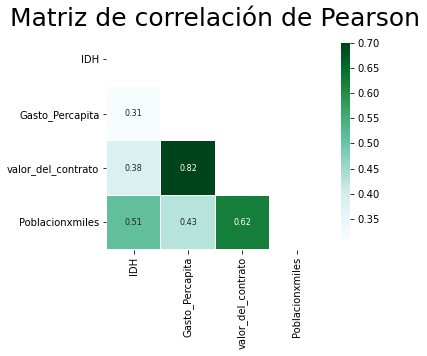

In [15]:
import seaborn as sns
Variables = ['IDH','Gasto_Percapita','valor_del_contrato','Poblacionxmiles']

mask=np.zeros_like(Base_Unificada[Variables].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
, ax = plt.subplots(figsize=(16, 12))
plt.title('Matriz de correlación de Pearson',fontsize=25)

sns.heatmap(Base_Unificada[Variables].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask, cbar_kws={"shrink": .9});


In [16]:
Base_Unificada = Base_Unificada.drop(['Poblacion','Poblacionxmiles','valor_del_contrato'],axis=1)
Base_Unificada

,año,IDH,Gasto_Percapita
departamento,,,
Antioquia,2016,0.765,915.0
Santander,2016,0.771,10.0
Antioquia,2017,0.767,69.0
Atlantico,2017,0.781,800.0
Bogota D.C.,2017,0.807,414.0
...,...,...,...
Santander,2019,0.778,44397.0
Sucre,2019,0.744,4292.0
Tolima,2019,0.747,101933.0


In [17]:
Base_Unificada.rename(index={"Antioquia":"ANTIOQUIA","Santander":"SANTANDER","Atlantico":"ATLÀNTICO","Bogota D.C.":"BOGOTÁ, D.C.","Bolivar":"BOLIVAR","Caldas":"CALDAS","Caqueta":"CAQUETÀ","Huila":"HUILA","Meta":"META","Tolima":"TOLIMA","Vichada":"VICHADA","Arauca":"ARAUCA","Boyaca":"BOYACÀ","Casanare":"CASANARE","Cauca":"CAUCA","Cesar":"CESAR","Choco":"CHOCÓ","Cordoba":"CÓRDOBA","Cundinamarca":"CUNDINAMARCA","Guajira":"LA GUAJIRA","Guaviare":"GUAVIARE","Magdalena":"MAGDALENA","Narino":"NARIÑO","Norte de Santander":"NORTE DE SANTANDER","Putumayo":"PUTUMAYO","Quindio":"QUINDIO","Risaralda":"RISARALDA","San Andres":"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA","Sucre":"SUCRE","Valle del Cauca":"VALLE DEL CAUCA"},inplace=True)
Base_Unificada

,año,IDH,Gasto_Percapita
departamento,,,
ANTIOQUIA,2016,0.765,915.0
SANTANDER,2016,0.771,10.0
ANTIOQUIA,2017,0.767,69.0
ATLÀNTICO,2017,0.781,800.0
"BOGOTÁ, D.C.",2017,0.807,414.0
...,...,...,...
SANTANDER,2019,0.778,44397.0
SUCRE,2019,0.744,4292.0
TOLIMA,2019,0.747,101933.0


In [19]:
Base_Unificada.to_excel('Base_Unificada.xlsx')

In [18]:
Base_Unificada.describe()

,año,IDH,Gasto_Percapita
count,72.000000,72.000000,72.000000
mean,2018.194444,0.751694,66604.305556
std,0.798571,0.028484,151101.351285
min,2016.000000,0.692000,4.000000
25%,2018.000000,0.726000,753.500000
50%,2018.000000,0.751500,8427.500000
75%,2019.000000,0.773250,31873.500000
max,2019.000000,0.813000,733319.000000
